In [6]:
# Setting PATH to import utils functions from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from utils.load_data import load_mnist
from CapsNet import CapsNet
import tensorflow as tf
import numpy as np

In [23]:
(X_train, y_train), (X_test , y_test) = load_mnist(size=(1024, 1024))

X_train.shape, y_train.shape

(TensorShape([1024, 28, 28, 1]), (1024,))

In [49]:
params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":5,
}

model = CapsNet(**params)
model._name = 'CapsNet-MNIST'
model.fit(X_train, y_train, tf.keras.optimizers.Adam(), train_metrics=['accuracy', 'precision', 'recall', 'f1'], validation=(X_test, y_test))

Epoch 10/10: 100%|██████████| 16/16 [00:10<00:00,  1.52it/s, Training loss : 0.0002, Validation loss : 0.0010]


{'accuracy': ListWrapper([0.73046875, 0.880859375, 0.931640625, 0.958984375, 0.9755859375, 0.984375, 0.9912109375, 0.994140625, 0.99609375, 0.998046875]),
 'precision': ListWrapper([0.7869042850743935, 0.8821360450541778, 0.9323164341553302, 0.9597349922782215, 0.9758753371772294, 0.9844796754254765, 0.9913282744380774, 0.9942167802953878, 0.9961495602433046, 0.9980851715686274]),
 'recall': ListWrapper([0.73046875, 0.880859375, 0.931640625, 0.958984375, 0.9755859375, 0.984375, 0.9912109375, 0.994140625, 0.99609375, 0.998046875]),
 'f1': ListWrapper([0.7078733483490959, 0.8797115754129688, 0.9314970266054711, 0.9588501192903185, 0.9755704687334392, 0.9843766457712997, 0.9912081193645913, 0.994139593429072, 0.996092799919463, 0.9980515311770161]),
 'loss': ListWrapper([0.008193316869437695, 0.003434023354202509, 0.0020263048354536295, 0.0013263473520055413, 0.0009380416013300419, 0.0006726053543388844, 0.0004966656561009586, 0.00036853578058071434, 0.00026650005020201206, 0.000183614756

,precision,recall,f1-score,support
0,0.934066,0.977011,0.955056,87.000000
1,0.992366,1.000000,0.996169,130.000000
2,0.950000,0.966102,0.957983,118.000000
3,0.989796,0.898148,0.941748,108.000000
4,0.971429,0.902655,0.935780,113.000000
5,0.870000,0.977528,0.920635,89.000000
6,0.952381,0.898876,0.924855,89.000000
7,0.960000,0.941176,0.950495,102.000000
8,0.965116,0.912088,0.937853,91.000000
9,0.853211,0.958763,0.902913,97.000000


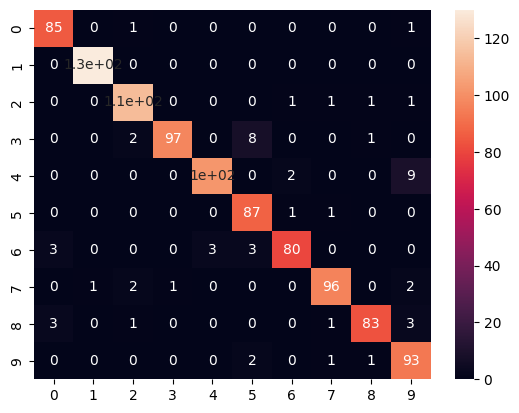

In [52]:
model.evaluate(X_test, y_test, np.arange(10))

In [44]:
params = {
    "epochs": 2,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 32,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 5,
    "r":2,
}

model2 = CapsNet(**params)
model2._name = 'CapsNet-MNIST'
model2.fit(X_train, y_train, tf.keras.optimizers.Adam(), train_metrics=['accuracy', 'precision', 'recall', 'f1'], validation=(X_test, y_test))

Epoch 2/2: 100%|██████████| 16/16 [00:03<00:00,  4.98it/s, Training loss : 0.0028, Validation loss : 0.0030]


{'accuracy': ListWrapper([0.8125, 0.888671875]),
 'precision': ListWrapper([0.8316313898168985, 0.8915455712523752]),
 'recall': ListWrapper([0.8125, 0.888671875]),
 'f1': ListWrapper([0.8080743059455672, 0.887795166210074]),
 'loss': ListWrapper([0.0067836870439350605, 0.0028228212613612413]),
 'val_accuracy': ListWrapper([0.712890625, 0.8095703125]),
 'val_precision': ListWrapper([0.7454603566390802, 0.8122699029006617]),
 'val_recall': ListWrapper([0.712890625, 0.8095703125]),
 'val_f1': ListWrapper([0.7025675133889245, 0.8076503654527663]),
 'val_loss': ListWrapper([0.004097479861229658, 0.002991802990436554])}

,precision,recall,f1-score,support
0,0.845361,0.942529,0.891304,87.0000
1,0.843137,0.992308,0.911661,130.0000
2,0.934066,0.720339,0.813397,118.0000
3,0.933333,0.648148,0.765027,108.0000
4,0.902174,0.734513,0.809756,113.0000
5,0.682243,0.820225,0.744898,89.0000
6,0.802198,0.820225,0.811111,89.0000
7,0.720000,0.882353,0.792952,102.0000
8,0.766667,0.758242,0.762431,91.0000
9,0.757282,0.804124,0.780000,97.0000


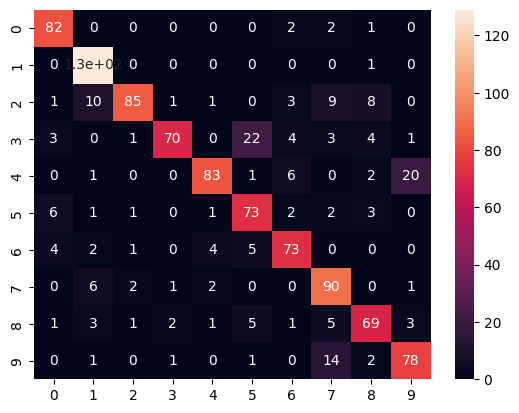

In [40]:
model2.evaluate(X_test, y_test, np.arange(10))

In [53]:
n_rounds = 100
import time

model_time = []
for i in range(n_rounds):
    start = time.time()
    model.predict(X_test)
    end = time.time()
    model_time.append((end - start) / len(X_test) * 1000)

model2_time = []
for i in range(n_rounds):
    start = time.time()
    model2.predict(X_test)
    end = time.time()
    model2_time.append((end - start) / len(X_test) * 1000)


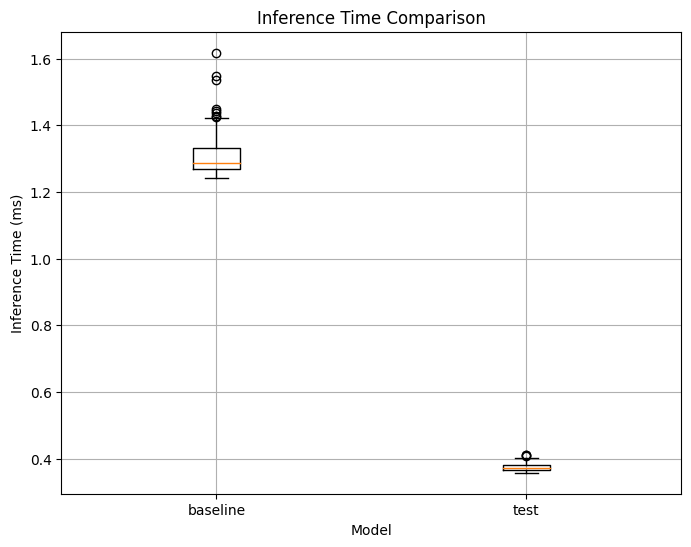

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "baseline": model_time,
    "test": model2_time
})
plt.figure(figsize=(8, 6))
plt.boxplot(df.values, labels=df.columns)
plt.title('Inference Time Comparison')
plt.xlabel('Model')
plt.ylabel('Inference Time (ms)')
plt.grid(True)
plt.show()

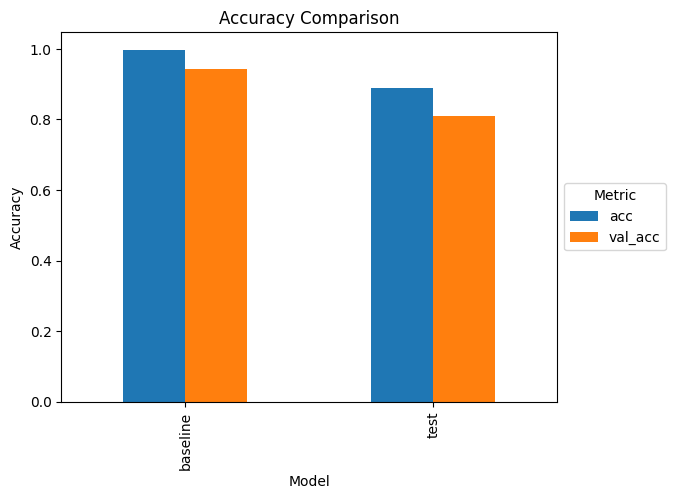

In [59]:
df = pd.DataFrame({
    'baseline': {'acc': model.training_metrics['accuracy'][-1], 'val_acc': model.training_metrics['val_accuracy'][-1]},
    'test': {'acc': model2.training_metrics['accuracy'][-1], 'val_acc': model2.training_metrics['val_accuracy'][-1]},
})

df = df.T
df.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend(title='Metric', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [60]:
model.summary()

Model: "CapsNet-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  10496     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2654464   
                                                                 
 dense_22 (Dense)            multiple                  82432     
                                                                 
 dense_23 (Dense)            multiple                  525312    
                                                                 
 dense (Dense)               multiple                  803600    
                                                                 
Total params: 5,550,864
Trainable params: 5,550,864
Non-trainable params: 0
_________________________________________________________________


In [61]:
model2.summary()

Model: "CapsNet-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  2624      
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  663808    
                                                                 
 dense_20 (Dense)            multiple                  26112     
                                                                 
 dense_21 (Dense)            multiple                  525312    
                                                                 
 dense (Dense)               multiple                  803600    
                                                                 
Total params: 2,482,256
Trainable params: 2,482,256
Non-trainable params: 0
_________________________________________________________________
